# Data analysis for train and dev sets  
This (template of) notebook is designed for analysing and exploring the two sets of training and developing

## 0. Load necessary Packages

In [64]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import emoji
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize

In [44]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


2024-10-18 19:44:01.186 python[60583:14938534] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-18 19:44:01.186 python[60583:14938534] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


True

## 1. Load the data

In [15]:
# Data reading function

def load_data(file_path):
    tags = [] # initiate an empty list to store annotation tags
    texts = [] # initiate en emtpy list to store tweets
    with open(file_path, 'r', encoding = 'utf-8') as file:
        for line in file:
            parts = line.strip().split(sep = '\t', maxsplit = 1)
            if len(parts) == 2:
                text, tag = parts 
                tags.append(tag)
                texts.append(text)
    return pd.DataFrame({'text': texts, 'tag': tags}) # return a dataframe with two columns: 'text' and 'tag'

In [16]:
# Load train and dev datasets

train = load_data('/Users/hongxuzhou/LfD/LfD_final_Assignment/data_sets/train.tsv')
dev = load_data('/Users/hongxuzhou/LfD/LfD_final_Assignment/data_sets/dev.tsv')

## 2. Tag distribution


To calculate the ratio of two tags in the corpora

In [21]:
# The ratio of training set
tag_counts_train = train['tag'].value_counts()
tag_ratio_train = tag_counts_train / tag_counts_train.sum()
print('The counts and ratio of the training set:')
print(tag_counts_train)
print(tag_ratio_train)


The counts and ratio of the training set:
tag
NOT    8192
OFF    4048
Name: count, dtype: int64
tag
NOT    0.669281
OFF    0.330719
Name: count, dtype: float64


In [26]:
# Write a function to calculate the counts and ratios of two datasets

def count_ratio(dataset):
    '''
    This function takes a dataset as input, and outputs the counts and ratios of the annotation tags in it. 
    '''
    tag_counts = dataset['tag'].value_counts()
    tag_ratio = tag_counts / tag_counts.sum()
    
    return tag_counts, tag_ratio
    
train_CR = count_ratio(train)
dev_CR = count_ratio(dev)

print(f'The counts and ratio of the training set: \n{train_CR[0]}\n{train_CR[1]}\n')
print(f'The counts and ratio of the development set: \n{dev_CR[0]}\n{dev_CR[1]}\n')

The counts and ratio of the training set: 
tag
NOT    8192
OFF    4048
Name: count, dtype: int64
tag
NOT    0.669281
OFF    0.330719
Name: count, dtype: float64

The counts and ratio of the development set: 
tag
NOT    648
OFF    352
Name: count, dtype: int64
tag
NOT    0.648
OFF    0.352
Name: count, dtype: float64



Visualise the distribution of training set with a pie chart 

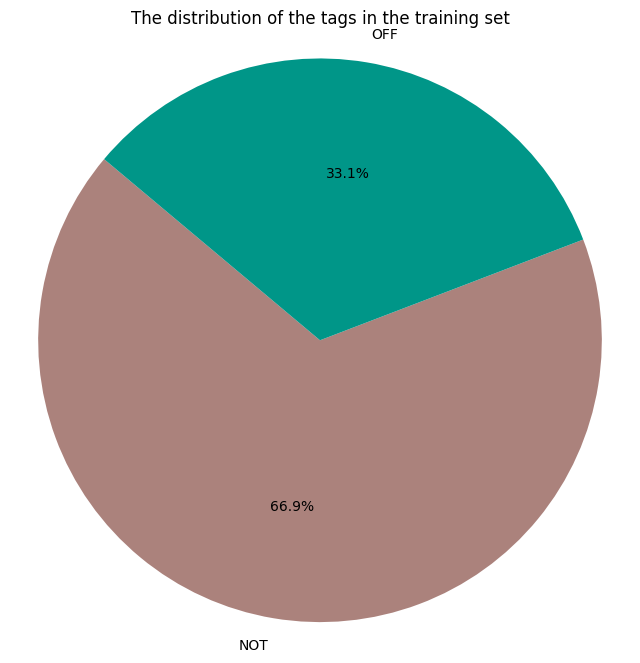

In [47]:
# Plot the distribution of the tags in the training set
colors = ['#ab827c', '#009688', ]
plt.figure(figsize=(8, 8))
plt.pie(train_CR[0], labels = train_CR[0].index, autopct='%1.1f%%', startangle=140, colors = colors )
plt.title('The distribution of the tags in the training set')
plt.axis('equal')

plt.show()

Pie chart for dev set distribution

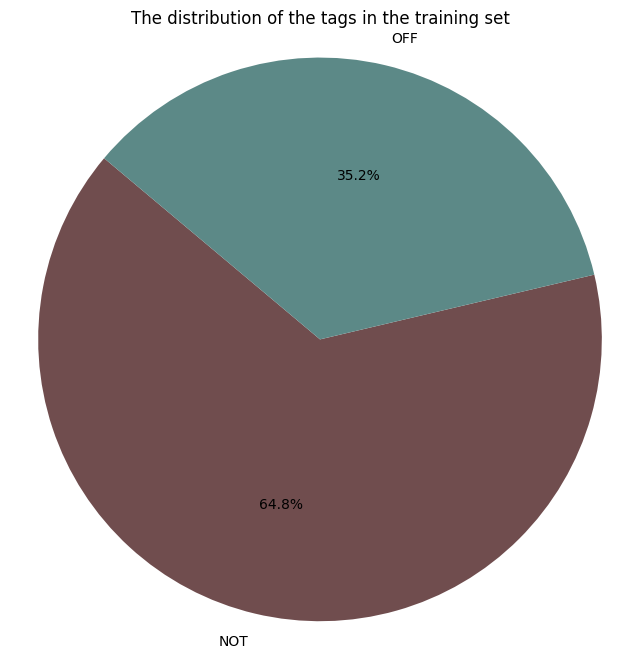

In [46]:


colors2 = ['#704d4e', '#5c8987']
plt.figure(figsize=(8, 8))
plt.pie(dev_CR[0], labels = train_CR[0].index, autopct='%1.1f%%', startangle=140, colors = colors2 )
plt.title('The distribution of the tags in the training set')
plt.axis('equal')

plt.show()

## 3. Most frequent words

In [61]:
# Most frequent words, excluding stopwords

def get_most_frequent_words(df, n = 30, column = 'text'):
    '''
    Get the most frequent words in a dataset, excluding stop words and considering the nature of tweets 
    
    Parameters:
    df(pandas.DataFrame): The dataset containing the text column
    n(int): The number of top words to return 
    column(str): The name of the column containing the text 
    '''
    # Get English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Exclude user mentions and URLs
    exclude_words = ['url', 'user']
    stop_words.update(exclude_words)
    
    # Tokenise and process the texts
    all_words = [] # Initiate an empty list to store all words
    for text in df[column]:
        tokens = word_tokenize(text.lower()) # Tokenise the text and convert to lower case
        
        words = [word for word in tokens if word.isalnum() and word not in stop_words] # Exclude non-alphabetic words and stopwords
        
        all_words.extend(words) # Add the words to the list of all words
    
    # Count word frequencies
    word_freq = Counter(all_words)
    
    # Get the n most common words
    most_common = word_freq.most_common(n)
    
    return most_common
    

In [62]:
print(tokens.head(10))

NameError: name 'tokens' is not defined

Represent the top 30 words 

In [56]:
train_t30 = get_most_frequent_words(train, n = 30)
dev_t30 = get_most_frequent_words(dev, n = 30)

print(f'The 30 most frequent words in the training set: \n{train_t30}\n')
print(f'The 30 most frequent words in the development set: \n{dev_t30}\n')

The 30 most frequent words in the training set: 
[('liberals', 1285), ('gun', 1265), ('control', 1140), ('antifa', 1081), ('like', 1036), ('maga', 925), ('conservatives', 873), ('people', 858), ('get', 613), ('amp', 611), ('trump', 601), ('one', 599), ('know', 598), ('would', 537), ('think', 527), ('good', 431), ('right', 414), ('us', 374), ('want', 364), ('go', 363), ('time', 357), ('need', 344), ('going', 339), ('see', 337), ('never', 334), ('shit', 328), ('even', 310), ('love', 300), ('say', 299), ('back', 297)]

The 30 most frequent words in the development set: 
[('liberals', 119), ('gun', 98), ('antifa', 89), ('maga', 85), ('control', 82), ('conservatives', 76), ('like', 71), ('amp', 66), ('people', 63), ('get', 49), ('right', 45), ('one', 41), ('know', 40), ('trump', 37), ('time', 33), ('much', 32), ('say', 32), ('would', 31), ('good', 29), ('even', 27), ('see', 26), ('think', 26), ('party', 26), ('never', 26), ('shit', 25), ('way', 24), ('us', 24), ('still', 24), ('really', 23)

## 4. Avg. post length


In [57]:
# Create a function to calculate the average number of words in a tweet
def avg_len (df, column = 'text'):
    '''
    Calculate the average number of words in a tweet
    
    Parameters:
    df(pandas.DataFrame): The dataset containing the text column
    column(str): The name of the column containing the text 
    '''
    # Tokenise the texts
    df['word_count'] = df[column].apply(lambda x: len(word_tokenize(x)))
    
    # Calculate the average number of words
    avg_len = df['word_count'].mean()
    
    return avg_len

In [59]:
train_avg_len = avg_len(train)
dev_avg_len = avg_len(dev)

print(f'The average number of words in a tweet in the training set: {train_avg_len}\n')
print(f'The average number of words in a tweet in the development set: {dev_avg_len}\n')

The average number of words in a tweet in the training set: 28.722058823529412

The average number of words in a tweet in the development set: 28.897



28 is not a very big number for a tweet. In other words, these tweets are generally short.

## 5. Non-standard spellings

In this step, I intend to find out the non-standard expressions by comparing the datasets with a very comprehensive dictionary. This is to illustrate the nature of the corpus. Also, this method will return the words that are not in the dictionary too, such as some newly created proper nouns and expressions. 

In [63]:
# Again, tokenise the test -- reinvented the wheel, but I am too lazy to modify the previous function

def tokenise_text(text):
    tokens = word_tokenize(text.lower())
    return tokens

# Apply this function to the text column in the training and development sets
train['tokens'] = train['text'].apply(tokenise_text)
dev['tokens'] = dev['text'].apply(tokenise_text)

# Can do a pos tagging following this step, but we gonna skip it for now because we will do that in implementing classic ML

In [66]:
# Compare with standard english words 

english_vocab = set(w.lower() for w in words.words())

def find_non_standard_words(tokens):
    '''
    This function takes the colum of tokens and returns the words that are not in the standard english vocabulary list provided by NLTK. 
    It also considers the nature of twitter texts and so exludes non-alphabetic words.
    input: tokens
    output: non_standard_words
    '''
    return [word for word in tokens if word.isalpha()and word.lower() not in english_vocab]

# Apply the fuction 
train['non_standard_words'] = train['tokens'].apply(find_non_standard_words)
dev['non_standard_words'] = dev['tokens'].apply(find_non_standard_words)


Once we have the non-standard expressions in the two datasets, we can calculate the ratio of them in the datasets

In [ ]:
# Calculate the percentage of non-standard words in the training and development sets

def non_std_ratio(df):
    '''
    Calculate the percentage of non-standard words in a dataset
    
    Parameters:
    df(pandas.DataFrame): The dataset containing the text column
    '''
    # Calculate the number of non-standard words
    df['non_std_count'] = df['non_standard_words'].apply(len)
    
    # Calculate the total number of words
    df['total_words'] = df['tokens'].apply(len)
    
    # Calculate the ratio of non-standard words
    df['non_std_ratio'] = df['non_std_count'] / df['total_words']
    
    return df['non_std_ratio'].mean()

### 5.1 The ratio of posts containing emojis

咱也不知道算这个玩意有没有意义，后面用不用得上

In [68]:
# Write a fuction to find out the emojis and emoticons in the text

def find_emojis_emoticons(text):
    '''
    This function takes the text and returns the emojis and emoticons in it. 
    input: text
    output: emojis, emoticons
    '''
    emojis = [] # Initiate an empty list to store emojis
    for char in emoji.emoji_list(text):
            emojis.append(char['emoji'])
            
    emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    
    return emojis, emoticons

# Apply the function to the text column in the training and development sets
train['emojis_emoticons'] = train['text'].apply(find_emojis_emoticons)
dev['emojis_emoticons'] = dev['text'].apply(find_emojis_emoticons)


The resutls show that two most frequently used emojis are 😂 and 🇺🇸. Both less than 1%. 

## 6. The collocations of some keywords